# Summary
- Spearmans of neuron rankings improve with higher layers
- Lower layers of xlnet large actually are similar to higher layers of bert large. 
- Final four layers of bert large are quite different from the rest. Weird, because architecturally nothing has changed.

In [7]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os.path import basename, dirname
import torch
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

from ipywidgets import FloatSlider, interactive
import sys
sys.path.append('..')
from var import fname2mname, network2pair, network_sort_key

In [8]:
method_l = [
    "maxcorr", 
    "mincorr", 
#     "maxlinreg", 
#     "minlinreg", 
#     "cca", 
    "lincka", 
    # "rbfcka",
]

In [9]:
# Set `res_d`, `network_l`, `num_neurons_d`
base = "/data/sls/temp/johnmwu/contextual-corr-analysis/results14_"
res_fname = {method : base + method for method in 
                method_l}

res_d = {}
for method in method_l:
    with open(res_fname[method], 'rb') as f:
        res_d[method] = pickle.load(f)

network_l = [network for network in res_d["maxcorr"]["corrs"]]

num_neurons_d = {}
for network in network_l:
    num_neurons_d[network] = len(next(iter(res_d["maxcorr"]["corrs"][network].values()))) # god this is a hack

# MaxCorr, MinCorr, MaxLinReg, MinLinReg

### Sorts

In [10]:
# rk_methods = {"maxcorr", "mincorr", "maxlinreg", "minlinreg"}
rk_methods = {"maxcorr"} #, "mincorr", "maxlinreg", "minlinreg"}

In [11]:
neuron_sorts = {network: {} for network in network_l}
for network in network_l:
    for method in rk_methods:
        neuron_sorts[network][method] = res_d[method]["neuron_sort"][network]

In [12]:
res_d["mincorr"]["neuron_sort"]

{'bert_large_cased-ptb_pos_dev.hdf5_0': [521,
  784,
  809,
  765,
  991,
  761,
  208,
  511,
  854,
  16,
  783,
  246,
  896,
  450,
  94,
  379,
  318,
  2,
  69,
  76,
  640,
  877,
  413,
  226,
  58,
  492,
  600,
  865,
  864,
  307,
  544,
  179,
  408,
  305,
  38,
  842,
  151,
  997,
  667,
  79,
  789,
  287,
  209,
  449,
  205,
  389,
  845,
  545,
  99,
  483,
  123,
  156,
  665,
  634,
  565,
  338,
  929,
  25,
  618,
  319,
  425,
  277,
  597,
  882,
  168,
  1018,
  218,
  284,
  772,
  760,
  571,
  691,
  354,
  265,
  816,
  298,
  563,
  928,
  432,
  554,
  273,
  826,
  889,
  567,
  961,
  220,
  225,
  384,
  602,
  599,
  375,
  86,
  264,
  454,
  482,
  570,
  621,
  982,
  259,
  137,
  117,
  976,
  936,
  875,
  332,
  1005,
  140,
  594,
  132,
  104,
  705,
  575,
  703,
  458,
  471,
  42,
  233,
  343,
  953,
  406,
  304,
  270,
  211,
  258,
  965,
  70,
  814,
  486,
  377,
  515,
  342,
  801,
  674,
  399,
  1002,
  986,
  206,
  832,
  109,

In [13]:
# Set `rk_ar_d`, `rk_df_d`, `spearman_d`
rk_ar_d = {}
rk_df_d = {}
spearman_d = {}
for network in network_l:
    # rk_ar[method_ix, neuron] = rank
    # need to invert the permutation
    rk_ar = np.stack([
            [neuron_sorts[network][method].index(neuron) for neuron in range(len(neuron_sorts[network][method]))]
                      for method in rk_methods
    ]).T
    rk_df = pd.DataFrame(rk_ar, columns=list(rk_methods))
    
    rk_ar_d[network] = rk_ar
    rk_df_d[network] = rk_df
    spearman_d[network] = rk_df.corr()

In [14]:
for network in network_l:
    print(network)
    # print(rk_df_d[network])
    print(spearman_d[network])

bert_large_cased-ptb_pos_dev.hdf5_0
         maxcorr
maxcorr      1.0
bert_large_cased-ptb_pos_dev.hdf5_1
         maxcorr
maxcorr      1.0
bert_large_cased-ptb_pos_dev.hdf5_2
         maxcorr
maxcorr      1.0
bert_large_cased-ptb_pos_dev.hdf5_3
         maxcorr
maxcorr      1.0
bert_large_cased-ptb_pos_dev.hdf5_4
         maxcorr
maxcorr      1.0
bert_large_cased-ptb_pos_dev.hdf5_5
         maxcorr
maxcorr      1.0
bert_large_cased-ptb_pos_dev.hdf5_6
         maxcorr
maxcorr      1.0
bert_large_cased-ptb_pos_dev.hdf5_7
         maxcorr
maxcorr      1.0
bert_large_cased-ptb_pos_dev.hdf5_8
         maxcorr
maxcorr      1.0
bert_large_cased-ptb_pos_dev.hdf5_9
         maxcorr
maxcorr      1.0
bert_large_cased-ptb_pos_dev.hdf5_10
         maxcorr
maxcorr      1.0
bert_large_cased-ptb_pos_dev.hdf5_11
         maxcorr
maxcorr      1.0
bert_large_cased-ptb_pos_dev.hdf5_12
         maxcorr
maxcorr      1.0
bert_large_cased-ptb_pos_dev.hdf5_13
         maxcorr
maxcorr      1.0
bert_large_cased

### Distributions

In [15]:
for network in network_l:
    print("\n\n" + network + ":")
    for method in rk_methods:
        print("\n" + method)
        if method == "maxlinreg" or method == "minlinreg": 
            corr_df = pd.DataFrame(res_d[method]['pred_power'][network])
        else:
            corr_df = pd.DataFrame(res_d[method]['corrs'][network])
        
        print("\nmaxcounts")
        print(corr_df.idxmax(axis=1).value_counts())
        
        print("\nmincounts")
        print(corr_df.idxmin(axis=1).value_counts())
        
        print("\ncorr_df_pctl")
        corr_df_pctl = pd.DataFrame()
        corr_df_pctl["max"] = corr_df.max(axis=1)
        corr_df_pctl["min"] = corr_df.min(axis=1)
        corr_df_pctl["med"] = corr_df.median(axis=1)
        print(corr_df_pctl.rank().corr()) # spearman
        
#         corr_df.plot()
#         plt.xlabel("neuron (sorted order)")
#         plt.ylabel("correlation")
#         plt.show()
        
#         plt.hist(corr_ar.ravel(), bins=100)
#         plt.xlabel("correlation")
#         plt.ylabel("count")
#         plt.show()



bert_large_cased-ptb_pos_dev.hdf5_0:

maxcorr

maxcounts
bert_large_cased-ptb_pos_dev.hdf5_1                  981
bert_base_cased-ptb_pos_dev.hdf5_0                    40
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0      2
openai_transformer-ptb_pos_dev.hdf5_2                  1
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    777
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23    153
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_16     15
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_19     11
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_20     11
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_22      9
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_13      8
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_18      8
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_21      7
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_17      6
xlnet_large_cased-ptb_pos_dev_include_embeddings.

          max       min       med
max  1.000000  0.171794  0.378886
min  0.171794  1.000000  0.741385
med  0.378886  0.741385  1.000000


bert_large_cased-ptb_pos_dev.hdf5_8:

maxcorr

maxcounts
bert_large_cased-ptb_pos_dev.hdf5_7                  612
bert_large_cased-ptb_pos_dev.hdf5_9                  411
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0      1
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    900
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     70
elmo_4x4096_512-ptb_pos_dev.hdf5_2                           10
elmo_4x4096_512-ptb_pos_dev.hdf5_3                            7
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_21      4
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_16      3
openai_transformer-ptb_pos_dev.hdf5_0                         3
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_20      3
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_22      3
calypso_transformer_6_512_base-ptb


maxcounts
bert_large_cased-ptb_pos_dev.hdf5_19                 998
bert_large_cased-ptb_pos_dev.hdf5_17                  24
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0      1
bert_large_cased-ptb_pos_dev.hdf5_20                   1
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    771
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     48
openai_transformer-ptb_pos_dev.hdf5_0                        35
elmo_original-ptb_pos_dev.hdf5_0                             32
elmo_4x4096_512-ptb_pos_dev.hdf5_0                           22
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_1      13
openai_transformer-ptb_pos_dev.hdf5_1                        13
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_2      10
elmo_4x4096_512-ptb_pos_dev.hdf5_3                            9
elmo_4x4096_512-ptb_pos_dev.hdf5_2                            9
openai_transformer-ptb_pos_dev.hdf5_12                        6
xlnet_large_cased-ptb_pos_dev_inc

          max       min       med
max  1.000000  0.501633  0.570761
min  0.501633  1.000000  0.807034
med  0.570761  0.807034  1.000000


openai_transformer-ptb_pos_dev.hdf5_4:

maxcorr

maxcounts
openai_transformer-ptb_pos_dev.hdf5_5    587
openai_transformer-ptb_pos_dev.hdf5_3    181
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    643
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     61
elmo_4x4096_512-ptb_pos_dev.hdf5_2                            7
elmo_4x4096_512-ptb_pos_dev.hdf5_3                            6
bert_large_cased-ptb_pos_dev.hdf5_24                          5
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_15      5
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_22      4
elmo_original-ptb_pos_dev.hdf5_2                              4
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_19      3
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_14      3
bert_base_cased-ptb_pos_dev.hdf5_12              

xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    640
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     60
elmo_4x4096_512-ptb_pos_dev.hdf5_2                           15
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_19      6
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_20      6
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_22      5
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_15      4
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_16      4
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_14      3
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_17      3
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_18      3
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_13      3
elmo_4x4096_512-ptb_pos_dev.hdf5_3                            3
bert_large_cased-ptb_pos_dev.hdf5_24                          2
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_21      2
elmo_4x4096_512-ptb_pos_dev.hdf5_0      

          max       min       med
max  1.000000  0.730597  0.875965
min  0.730597  1.000000  0.783839
med  0.875965  0.783839  1.000000


elmo_original-ptb_pos_dev.hdf5_1:

maxcorr

maxcounts
elmo_original-ptb_pos_dev.hdf5_2                           1017
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_0       3
bert_base_cased-ptb_pos_dev.hdf5_7                            1
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0             1
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_3             1
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_5             1
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    693
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23    143
openai_transformer-ptb_pos_dev.hdf5_0                        19
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_22     15
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_20     10
                                                           ... 
xlnet_large_case


maxcounts
elmo_4x4096_512-ptb_pos_dev.hdf5_2    1023
elmo_4x4096_512-ptb_pos_dev.hdf5_3       1
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    768
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     94
openai_transformer-ptb_pos_dev.hdf5_12                       17
openai_transformer-ptb_pos_dev.hdf5_0                        12
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_21      9
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_20      9
bert_large_cased-ptb_pos_dev.hdf5_5                           8
bert_large_cased-ptb_pos_dev.hdf5_23                          6
bert_large_cased-ptb_pos_dev.hdf5_6                           6
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_22      6
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_18      6
bert_base_cased-ptb_pos_dev.hdf5_12                           5
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_14      5
bert_large_cased-ptb_pos_dev.hdf5_24           


maxcorr

maxcounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_7    547
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_5    476
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0            1
dtype: int64

mincounts
openai_transformer-ptb_pos_dev.hdf5_0                      70
bert_large_cased-ptb_pos_dev.hdf5_2                        59
elmo_4x4096_512-ptb_pos_dev.hdf5_2                         58
elmo_original-ptb_pos_dev.hdf5_0                           58
elmo_4x4096_512-ptb_pos_dev.hdf5_0                         53
                                                           ..
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_5           2
bert_large_cased-ptb_pos_dev.hdf5_16                        2
bert_large_cased-ptb_pos_dev.hdf5_19                        2
bert_base_cased-ptb_pos_dev.hdf5_6                          1
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_1     1
Length: 61, dtype: int64

corr_df_pctl
          max       min       med
max  1.00000


maxcounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_15    666
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_17    358
dtype: int64

mincounts
elmo_original-ptb_pos_dev.hdf5_0                            95
elmo_4x4096_512-ptb_pos_dev.hdf5_0                          80
elmo_4x4096_512-ptb_pos_dev.hdf5_2                          80
bert_large_cased-ptb_pos_dev.hdf5_2                         57
openai_transformer-ptb_pos_dev.hdf5_0                       56
                                                            ..
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24     1
openai_transformer-ptb_pos_dev.hdf5_9                        1
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_4            1
openai_transformer-ptb_pos_dev.hdf5_10                       1
bert_large_cased-ptb_pos_dev.hdf5_20                         1
Length: 62, dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.555984  0.481465
min  0.555984  1.000000  0.914144
med

# LinCKA

In [16]:
lincka_df = pd.DataFrame(res_d['lincka']['similarities'])
lincka_df = lincka_df.reindex(network_l)
lincka_df = lincka_df.reindex(lincka_df.columns)

In [17]:
network = "elmo_original-ptb_pos_dev.hdf5_0"
lincka_df.sort_values(by=network)[network]

xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    0.033084
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23    0.169486
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_6           0.304333
bert_large_cased-ptb_pos_dev.hdf5_21                        0.315199
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_22    0.330310
                                                              ...   
elmo_original-ptb_pos_dev.hdf5_1                            0.688917
elmo_4x4096_512-ptb_pos_dev.hdf5_1                          0.693041
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0           0.706949
elmo_4x4096_512-ptb_pos_dev.hdf5_0                          0.713163
elmo_original-ptb_pos_dev.hdf5_0                                 NaN
Name: elmo_original-ptb_pos_dev.hdf5_0, Length: 91, dtype: float64

# RBFCKA

In [18]:
# rbfcka_d = torch.load(res_fname["rbfcka"])
# rbfcka_df = pd.DataFrame(rbfcka_d)

In [19]:
# rbfcka_df

In [20]:
# network = "bert_large_cased_0"
# rbfcka_df.sort_values(by=network)[network]

# CCA

In [21]:
sv_corrs = res_d['cca']['corrs']
sv_similarities = res_d['cca']['sv_similarities']
pw_similarities = res_d['cca']['pw_similarities']
pw_corrs = res_d['cca']['pw_corrs']
pw_alignments = res_d['cca']['pw_alignments']

KeyError: 'cca'

In [ ]:
sv_sim_df = pd.DataFrame(sv_similarities)
sv_sim_df = sv_sim_df.reindex(network_l)
sv_sim_df = sv_sim_df.reindex(sv_sim_df.columns)

pw_sim_df = pd.DataFrame(pw_similarities)
pw_sim_df = pw_sim_df.reindex(network_l)
pw_sim_df = pw_sim_df.reindex(pw_sim_df.columns)

sv_corrs_df = pd.DataFrame(sv_corrs)
sv_corrs_df = sv_corrs_df.reindex(network_l)
sv_corrs_df = sv_corrs_df.reindex(sv_corrs_df.columns)

pw_corrs_df = pd.DataFrame(pw_corrs)
pw_corrs_df = pw_corrs_df.reindex(network_l)
pw_corrs_df = pw_corrs_df.reindex(pw_corrs_df.columns)

pw_alignments_df = pd.DataFrame(pw_alignments)
pw_alignments_df = pw_alignments_df.reindex(network_l)
pw_alignments_df = pw_alignments_df.reindex(pw_alignments_df.columns)

In [ ]:
max_corrs_df = sv_corrs_df.applymap(lambda t: float('nan') if type(t) is float else t.max().item())

### SVCCA

In [ ]:
network = "elmo_original-ptb_pos_dev.hdf5_0"
sv_sim_df.sort_values(by=network)[network]

### PWCCA

In [ ]:
network = "elmo_original-ptb_pos_dev.hdf5_0"
pw_sim_df.sort_values(by=network)[network]

# Heatmaps

In [22]:
plt.rcParams["figure.figsize"] = (20,15)

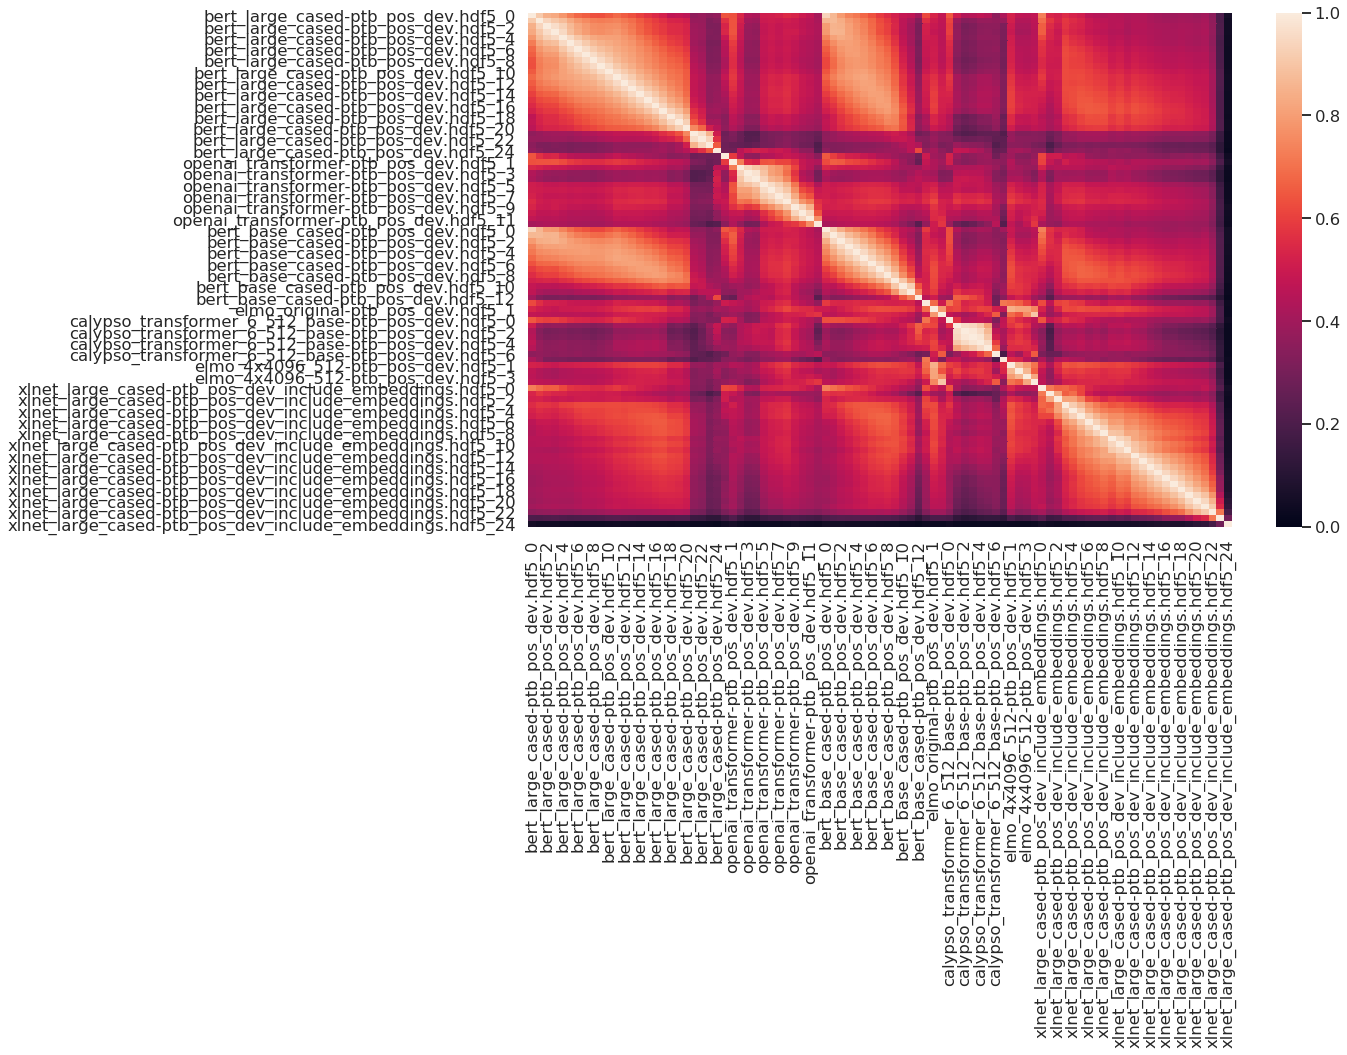

In [23]:
# lincka
fname_prefix = "temp_lincka8_1.00"
fname = "{0}.png".format(fname_prefix)
sns.heatmap(lincka_df.fillna(1), vmin=0, vmax=1)
plt.tight_layout()
plt.savefig(fname, transparent=True)

In [ ]:
def corrs_update(fl, corr_df, fname_prefix, weights_df=None):
    fname = "{0}{1:.2f}.png".format(fname_prefix, fl)
    try:
        im = plt.imread(fname)
        plt.imshow(im)
    except:
        if weights_df is None: # eg. svcca, don't need to do special division
            df = corr_df.applymap(lambda t: float('nan') if type(t) is float else 
                                              t[:int(fl*len(t))].mean())
        else:
            denominator_df = weights_df.applymap(lambda t: float('nan') if type(t) is float else 
                                                             t[:int(fl*len(t))].sum())
            df = corr_df.applymap(lambda t: float('nan') if type(t) is float else
                                            t[:int(fl*len(t))].sum())
            df /= denominator_df
        sns.heatmap(df.fillna(1), vmin=0, vmax=1)
        # sns.heatmap(df.fillna(1), )
        plt.tight_layout()
        plt.savefig(fname, transparent=True)
        plt.show()

In [ ]:
# interactive updates
def pw_update(fl):
    corrs_update(fl, pw_corrs_df, "temp_pw8_", weights_df=pw_alignments_df)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(pw_update, fl=slider)

In [ ]:
# interactive updates
def sv_update(fl):
    corrs_update(fl, sv_corrs_df, "temp_sv8_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(sv_update, fl=slider)

In [ ]:
# interactive for maxmincorr
maxmin_corrs = res_d['maxcorr']['corrs']
maxmin_corrs_df = pd.DataFrame(maxmin_corrs).applymap(lambda a: float('nan') if type(a) is float else -np.sort(-a)) # np sort has no reverse keyword
maxmin_corrs_df = maxmin_corrs_df.reindex(maxmin_corrs_df.columns)
def maxmincorr_update(fl):
    corrs_update(fl, maxmin_corrs_df, "temp_maxmincorr8_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(maxmincorr_update, fl=slider)

In [ ]:
# interactive for linregcorr
linreg_corrs = res_d['maxlinreg']['pred_power']
linreg_corrs_df = pd.DataFrame(linreg_corrs).applymap(lambda a: float('nan') if type(a) is float else -np.sort(-a)) # np sort has no reverse keyword
linreg_corrs_df = linreg_corrs_df.reindex(linreg_corrs_df.columns)
def linregcorr_update(fl):
    corrs_update(fl, linreg_corrs_df, "temp_linregcorr8_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(linregcorr_update, fl=slider)

In [ ]:
# rbfcka
# sns.heatmap(rbfcka_df.reindex(rbfcka_df.columns).fillna(1), vmin=0, vmax=1)

In [ ]:
# comparing models
# use lincka
model1 = "elmo"
model2 = "elmo"
cols = [s for s in lincka_df.columns if s.find(model1) >= 0]
rows = [s for s in lincka_df.columns if s.find(model2) >= 0]

In [ ]:
df = lincka_df.loc[rows, cols]

sns.heatmap(df, xticklabels=range(len(df.columns)), yticklabels=range(len(df.index)), annot=True)
plt.xlabel(model1)
plt.ylabel(model2)
plt.show()

# Localized vs distributed

In [ ]:
locl_meth = "maxcorr"
dist_meth = "cca"

# Localized and distributed dataframes
locl_df = pd.DataFrame(res_d[locl_meth]['similarities'])
locl_df = locl_df.reindex(locl_df.columns)

dist_df = pd.DataFrame(res_d[dist_meth]['sv_similarities'])
dist_df = dist_df.reindex(dist_df.columns)

# Localization and distributivity statistics
locl_ser = locl_df.mean(axis=1)
locl_ser = (locl_ser - locl_ser.mean()) / locl_ser.std()

dist_ser = dist_df.mean(axis=1)
dist_ser = (dist_ser - dist_ser.mean()) / dist_ser.std()

# diff_ser
diff_ser = locl_ser - dist_ser

In [ ]:
diff_df = pd.DataFrame(diff_ser, columns=['score'])
x = [network_sort_key(layer) for layer in diff_df.index.values]
models, layers = list(zip(*x))
# print(models)
# print(layers)
diff_df['layer'] = layers
diff_df['model'] = models
# diff_df.head()
g = sns.lineplot(data=diff_df, x='layer', y='score', hue='model')
handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles[1:], labels=labels[1:])
g.set_title('Localization score in layers of various models')
g.get_figure().savefig('all-loc-score.pdf')

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): # print everything
    print(diff_ser.sort_values())

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): # print everything
    print(locl_ser.sort_values())

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): # print everything
    print(dist_ser.sort_values())